<a href="https://colab.research.google.com/github/Aarthi-N/Aarthi-N/blob/main/customer_shopping_trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/shopping_trends_updated[1].csv')

In [ ]:
df.shape

(3900, 18)

In [ ]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


# Check the info of the dataset:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

**Gender Distribution:**


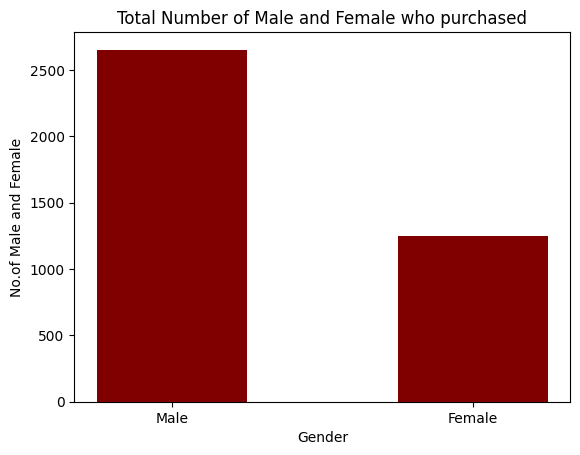

In [ ]:
plt.bar(df['Gender'].unique(), df['Gender'].value_counts(), width=0.5, color='maroon')
plt.xlabel('Gender')
plt.ylabel('No.of Male and Female')
plt.title('Total Number of Male and Female who purchased')
plt.show()

**Categorywise Distribution:**

Text(0, 0.5, ' ')

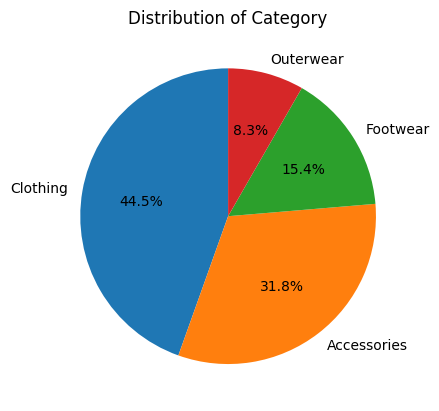

In [ ]:
df['Category'].value_counts().plot(kind='pie', autopct='%.1f%%', startangle=90)
plt.title('Distribution of Category')
plt.ylabel(' ')

**Seasonal Distribution:**

Text(0, 0.5, ' ')

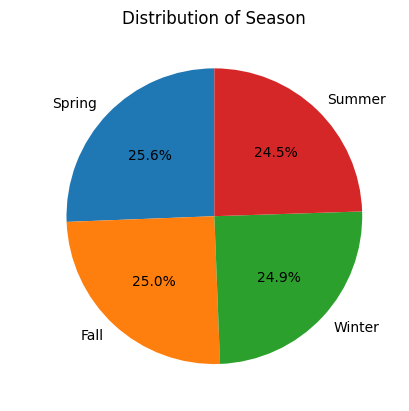

In [ ]:
df['Season'].value_counts().plot(kind='pie', autopct='%.1f%%', startangle=90)
plt.title('Distribution of Season')
plt.ylabel(' ')

**Distribution of Category(Genderwise):**

Text(0.5, 1.0, 'Distribution of gender by category')

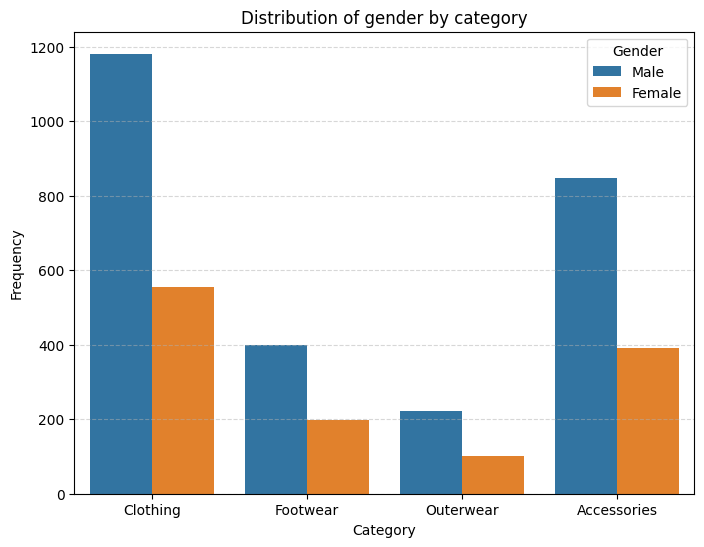

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Category', hue='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Distribution of gender by category')

**Most Purchased Items:**

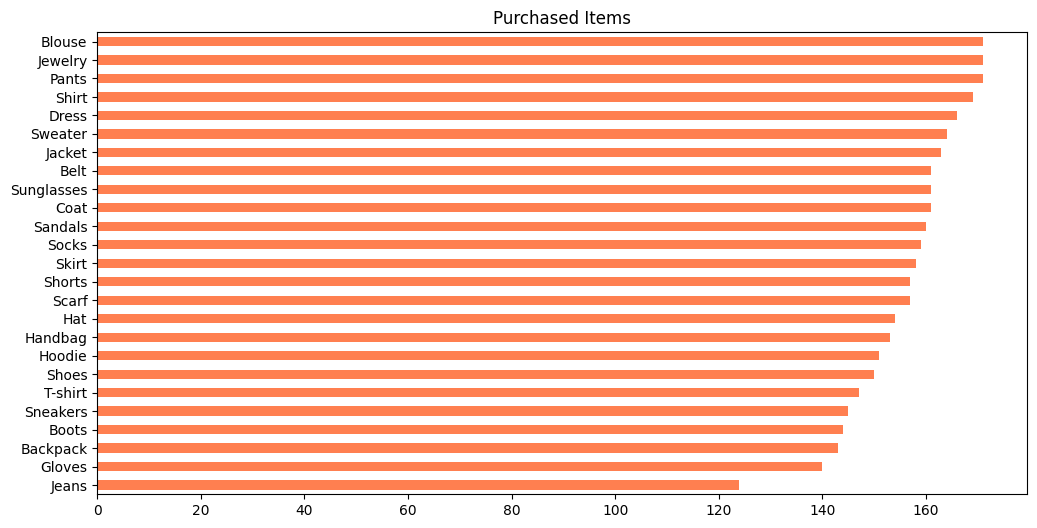

In [ ]:
plt.figure(figsize=(12,6))
df['Item Purchased'].value_counts().sort_values(ascending=True).plot(kind='barh', title='Purchased Items', color='coral')
plt.yticks(rotation=0)
plt.show()

**Highest sales by Location:**

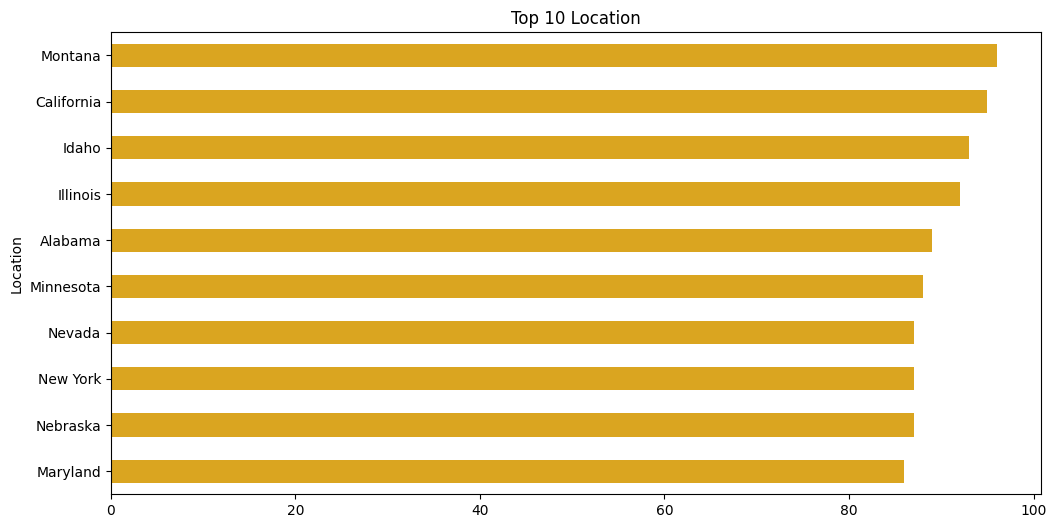

In [ ]:
plt.figure(figsize=(12,6))
df['Location'].value_counts().head(10).sort_values(ascending=True).plot(kind='barh', title='Top 10 Location', color='goldenrod')
plt.yticks(rotation=0)
plt.ylabel('Location')
plt.show()

**Subscription Status:**

Text(0.5, 1.0, 'Subscription status')

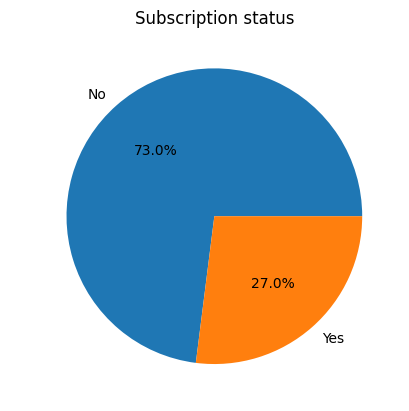

In [ ]:
df['Subscription Status'].value_counts().plot(kind='pie', autopct='%.1f%%')
plt.ylabel(' ')
plt.title('Subscription status')

**Shipping Type Distribution:**

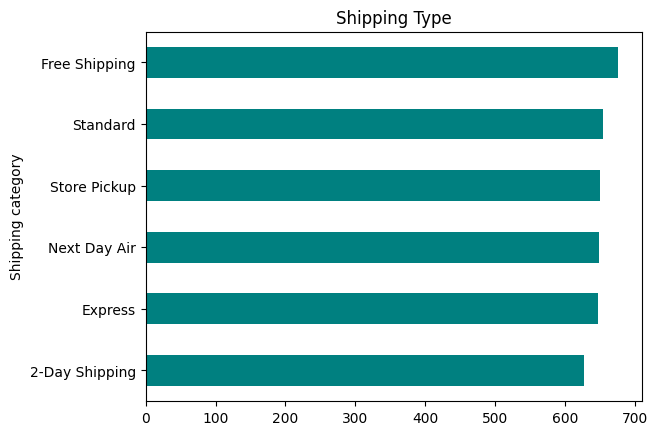

In [ ]:
df['Shipping Type'].value_counts().sort_values(ascending=True).plot(kind='barh', title='Shipping Type', color='teal' )
plt.ylabel('Shipping category')
plt.yticks(rotation=0)
plt.show()

**Frequency of Purchases**:

Text(0.5, 1.0, 'Frequency of Purchases by Gender')

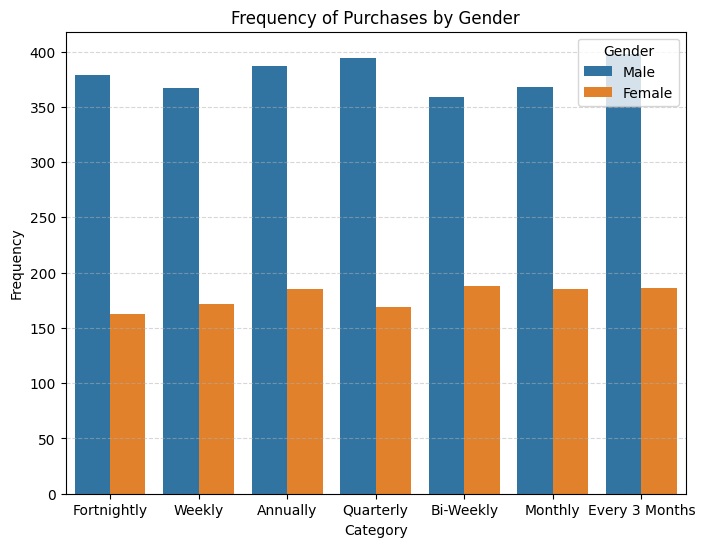

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Frequency of Purchases', hue='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Frequency of Purchases by Gender')

**Seasonal Spend:**

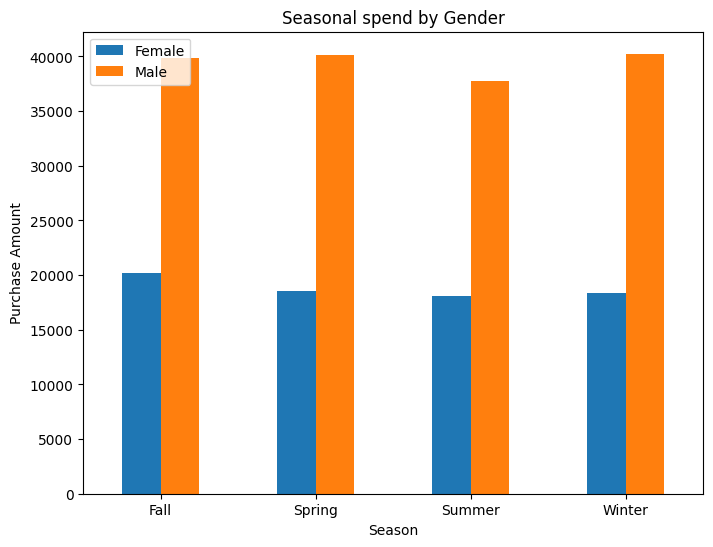

In [ ]:
spends = df.pivot_table(index=['Season'],
                        columns=['Gender'],
                        values='Purchase Amount (USD)',
                        aggfunc='sum'
                        )
spends.plot(kind='bar', figsize=(8,6))
plt.title('Seasonal spend by Gender')
plt.xlabel('Season')
plt.ylabel('Purchase Amount')
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.show()

**Discount Applied for Items Purchased:**

Text(0, 0.5, ' ')

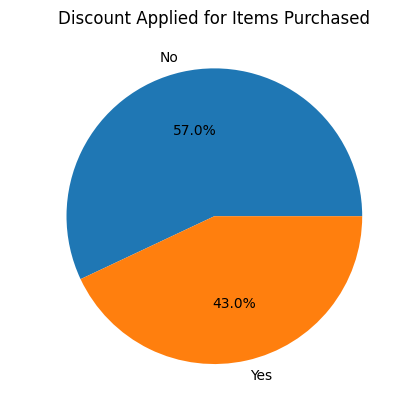

In [ ]:
df['Discount Applied'].value_counts().plot(kind='pie', autopct='%.1f%%')
plt.title('Discount Applied for Items Purchased')
plt.ylabel(' ')

**Age Distribution:**

<Axes: ylabel='Density'>

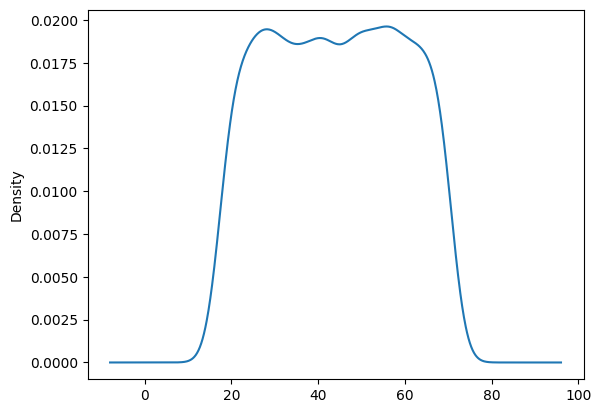

In [ ]:
df['Age'].plot(kind='kde')

**Items Rating:**

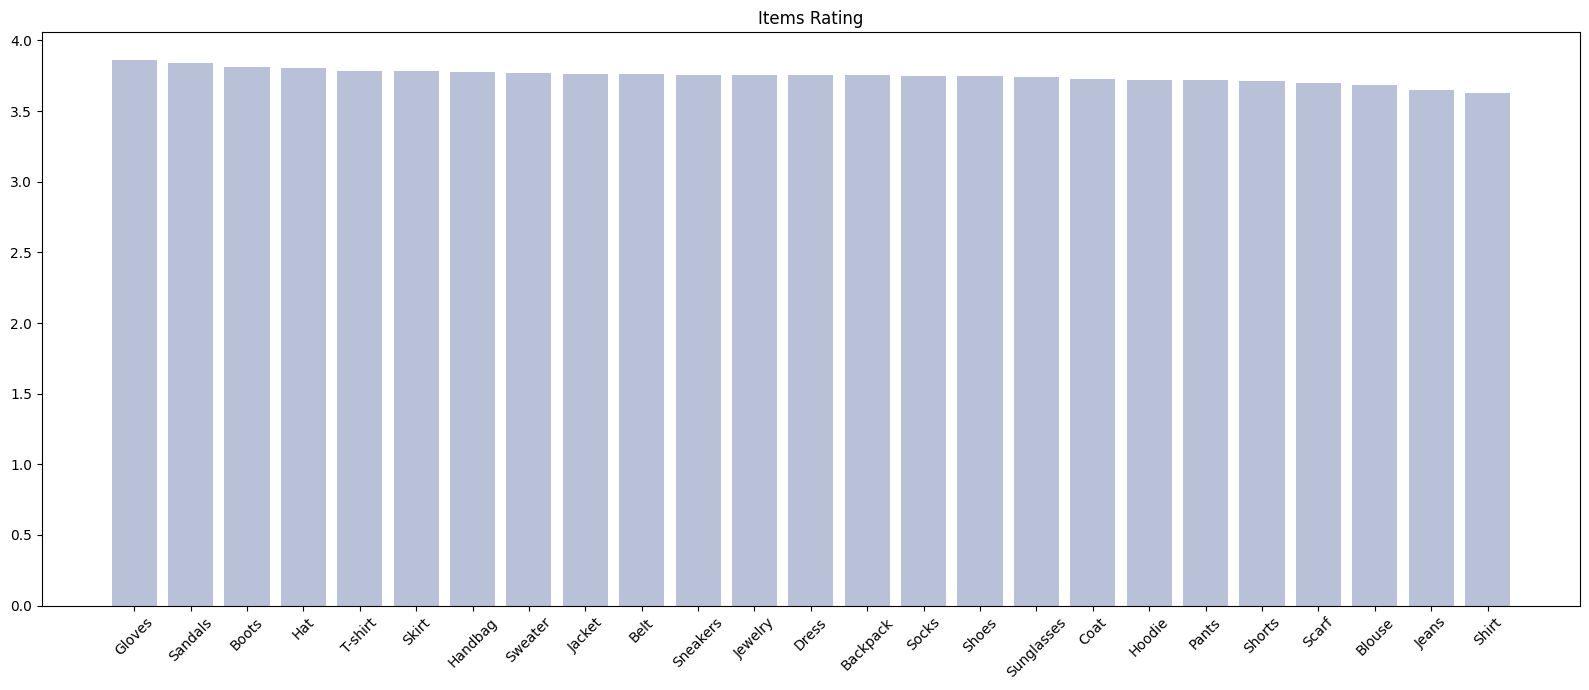

In [ ]:
rate_item = df.groupby(['Item Purchased'])['Review Rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(16,7))
plt.bar(x=rate_item.index, height=rate_item, color=(0.1, 0.2, 0.5, 0.3))
plt.title('Items Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Promo Code Used:**

Text(0, 0.5, ' ')

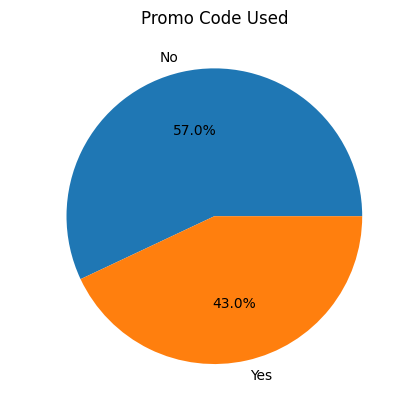

In [ ]:
df['Promo Code Used'].value_counts().plot(kind='pie', autopct='%.1f%%')
plt.title('Promo Code Used')
plt.ylabel(' ')

**Income of Every Season:**

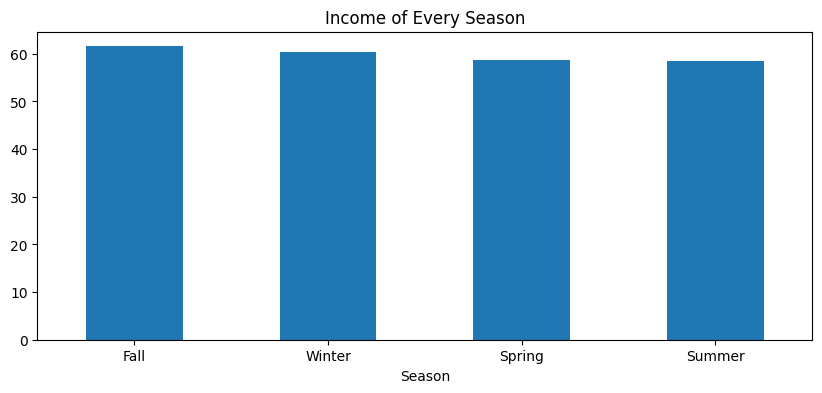

In [ ]:
df.groupby('Season')['Purchase Amount (USD)'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(10,4), title='Income of Every Season')
plt.xticks(rotation=0)
plt.show()

**Payment Method Distribution:**

Text(0, 0.5, ' ')

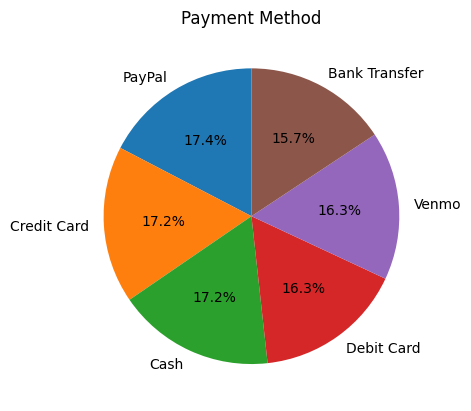

In [ ]:
df['Payment Method'].value_counts().plot(kind='pie', autopct='%.1f%%', startangle=90)
plt.title('Payment Method')
plt.ylabel(' ')

**Favorite Color:**

Text(0.5, 0, 'Color')

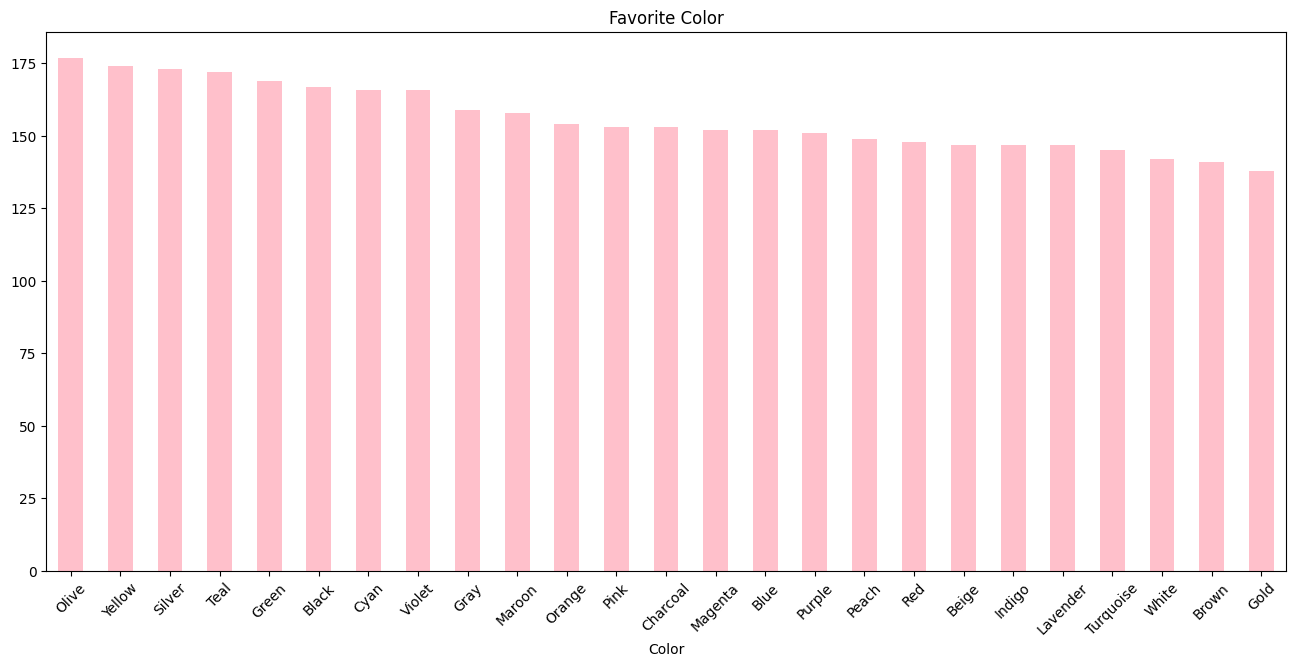

In [ ]:
plt.figure(figsize=(16,7))
df['Color'].value_counts().sort_values(ascending=False).plot(kind='bar', title='Favorite Color', color='pink')
plt.xticks(rotation=45)
plt.xlabel('Color')

**What is the average age of customers?**

In [ ]:
average_age = df['Age'].mean()
print("Average Age:", average_age)

Average Age: 44.06846153846154


**What is the most common item purchased?**

In [ ]:
most_common_item = df['Item Purchased'].mode()[0]
print('Most Common Item Purchased:', most_common_item)

Most Common Item Purchased: Blouse


**What is the total purchase amount of each category?**

In [ ]:
total_purchase_by_category = df.groupby('Category')['Purchase Amount (USD)'].sum()
print('Total Purchase Amount by Category:')
print(total_purchase_by_category)

Total Purchase Amount by Category:
Category
Accessories     74200
Clothing       104264
Footwear        36093
Outerwear       18524
Name: Purchase Amount (USD), dtype: int64


**What is the median purchase amount?**

In [ ]:
median_purchase_amount = df['Purchase Amount (USD)'].median()
print("Median Purchase Amount (USD):", median_purchase_amount)

Median Purchase Amount (USD): 60.0


**How many customers have opted for subscription?**

In [ ]:
subscription_count = df[df['Subscription Status'] == 'Yes']['Customer ID'].count()
print("Number of customers with subscription:", subscription_count)

Number of customers with subscription: 1053


**What is the average purchase amount of customers with a subscription status of 'Yes' and 'No'?**

In [ ]:
avg_purchase_subscription_yes = df[df['Subscription Status'] == 'Yes']['Purchase Amount (USD)'].mean()
avg_purchase_subscription_no = df[df['Subscription Status'] == 'No']['Purchase Amount (USD)'].mean()
print("Average Purchase Amount for Subscription 'Yes':", avg_purchase_subscription_yes)
print("Average Purchase Amount for Subscription 'No':", avg_purchase_subscription_no)

Average Purchase Amount for Subscription 'Yes': 59.49192782526116
Average Purchase Amount for Subscription 'No': 59.865121180189675


**What is the most common season for purchases?**

In [ ]:
most_common_season = df['Season'].mode()[0]
print("Most Common Season for Purchases:", most_common_season)

Most Common Season for Purchases: Spring


**What is the total purchase amount of each gender?**

In [ ]:
total_purchase_by_gender = df.groupby('Gender')['Purchase Amount (USD)'].sum()
print("Total purchase amount of each gender:")
print(total_purchase_by_gender)

Total purchase amount of each gender:
Gender
Female     75191
Male      157890
Name: Purchase Amount (USD), dtype: int64


**How many customers used promocode for their purchase?**

In [ ]:
promo_code_count = df[df['Promo Code Used'] == 'Yes']['Customer ID'].count()
print("Number of customers who used promo code:", promo_code_count)

Number of customers who used promo code: 1677


**What is the maximum and minimum review rating in the dataset?**

In [ ]:
max_review_rating = df['Review Rating'].max()
min_review_rating = df['Review Rating'].min()
print("Maximum review rating:", max_review_rating)
print("Minimum review rating:", min_review_rating)

Maximum review rating: 5.0
Minimum review rating: 2.5


**How many customers have made more than 30 previous purchases?**

In [ ]:
customer_above_30_purchases = df[df['Previous Purchases'] > 30]['Customer ID'].count()
print("Customer who made more than 30 previous purchases:", customer_above_30_purchases)

Customer who made more than 30 previous purchases: 1549


**What is the average purchase amount for customers who made more than 30 previous purchases?**

In [ ]:
avg_purchase_amount_above_30_previous = df[df['Previous Purchases'] > 30]['Purchase Amount (USD)'].mean()
print("Average purchase amount for customers who made more than 30 previous purchases:", avg_purchase_amount_above_30_previous)

Average purchase amount for customers who made more than 30 previous purchases: 60.02840542285345


**What is the average purchase amount for customers who used a discount?**

In [ ]:
avg_amount_discount = df[df['Discount Applied'] == 'Yes']['Purchase Amount (USD)'].mean()
print("Average purchase amount of customers who used a discount is:", avg_amount_discount)

Average purchase amount of customers who used a discount is: 59.27906976744186


**What is the most common category of items purchased by female customers with a review rating below 3**?

In [ ]:
common_category_low_rating_female = df[(df['Gender'] == 'Female') & (df['Review Rating'] < 3)]['Category'].mode()[0]
print("Most Common Category of items purchased by female customers with a low review rating:", common_category_low_rating_female)

Most Common Category of items purchased by female customers with a low review rating: Clothing


**What is the total purchase amount of customers in each location?**

In [ ]:
purchase_amount_location = df.groupby('Location')['Purchase Amount (USD)'].sum()
print("Total purchase amount of customers in each location is:")
print(purchase_amount_location)

Total purchase amount of customers in each location is:
Location
Alabama           5261
Alaska            4867
Arizona           4326
Arkansas          4828
California        5605
Colorado          4222
Connecticut       4226
Delaware          4758
Florida           3798
Georgia           4645
Hawaii            3752
Idaho             5587
Illinois          5617
Indiana           4655
Iowa              4201
Kansas            3437
Kentucky          4402
Louisiana         4848
Maine             4388
Maryland          4795
Massachusetts     4384
Michigan          4533
Minnesota         4977
Mississippi       4883
Missouri          4691
Montana           5784
Nebraska          5172
Nevada            5514
New Hampshire     4219
New Jersey        3802
New Mexico        5014
New York          5257
North Carolina    4742
North Dakota      5220
Ohio              4649
Oklahoma          4376
Oregon            4243
Pennsylvania      4926
Rhode Island      3871
South Carolina    4439
South Dakota   

**What is the total purchase amount for each clothing size(XL, L, M, S)?**

In [ ]:
total_purchase_by_size = df[df['Category'] == 'Clothing'].groupby('Size')['Purchase Amount (USD)'].sum()
print("Total purchase amount for each clothing size:")
print(total_purchase_by_size)

Total purchase amount for each clothing size:
Size
L     27864
M     47041
S     17416
XL    11943
Name: Purchase Amount (USD), dtype: int64


**What is the total purchase amount of customers who have made more than 40 previous purchases?**

In [ ]:
total_purchase_previous_40 = df[df['Previous Purchases'] > 40]['Purchase Amount (USD)'].sum()
print("Total purchase amount of customers who have made more than 40 previous purchases:", total_purchase_previous_40)

Total purchase amount of customers who have made more than 40 previous purchases: 46590
